In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
import seaborn as sns

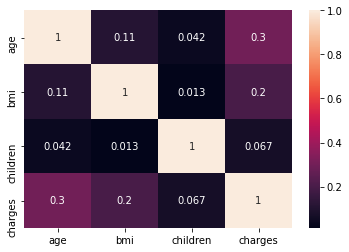

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
from sklearn.preprocessing import LabelEncoder



In [18]:
for i in df.columns:
  if df[i].dtype == 'object':
    le = LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [20]:
len(np.unique(df['region']))

4

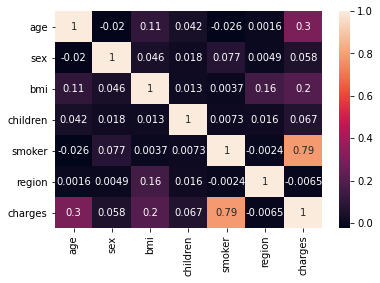

In [21]:
sns.heatmap(df.corr(), annot=True)

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
predictions = lr.predict(X_test)


In [35]:
import sklearn.metrics as sm
print('Root Mean Square Error: ',round(np.sqrt(np.mean(predictions -y_test)**2),2))
print('Mean Square Error:', round(sm.mean_squared_error(y_test, predictions ),2))
print('Mean Absolut Error:', round(sm.mean_absolute_error(y_test, predictions ),2))
print('Median Absolut Error:', round(sm.median_absolute_error(y_test, predictions ),2))
print('Explain Variance Score:', round(sm.explained_variance_score(y_test, predictions)*100,2))
print('R2 score:', round(sm.r2_score(y_test, predictions)*100,2))

Root Mean Square Error:  567.45
Mean Square Error: 35314269.22
Mean Absolut Error: 4144.82
Median Absolut Error: 2927.2
Explain Variance Score: 76.15
R2 score: 75.93


Text(0, 0.5, 'Predictions')

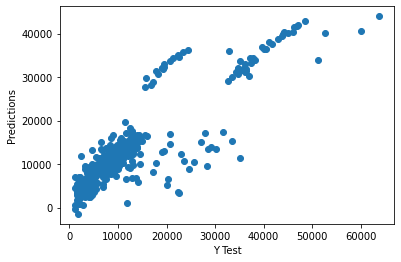

In [36]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

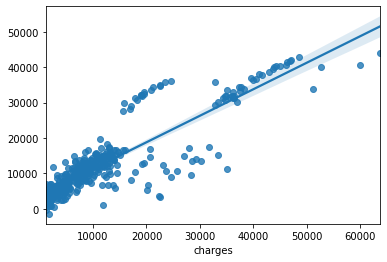

In [39]:
sns.regplot(x = y_test, y = predictions, data = [y_test,predictions])